<a href="https://colab.research.google.com/github/aelee-im/Forecasting-business-opportunity-by-Topic-Modeling/blob/main/LDA_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/personal

/content/gdrive/My Drive/personal


In [ ]:
ls -ltr

total 2797192
-rw------- 1 root root        151 Nov 14 14:52 df.gsheet
drwx------ 2 root root       4096 Nov 14 16:04 mallet-2.0.8/
-rw------- 1 root root      88777 Nov 15 11:17 LDA.html
-rw------- 1 root root     880842 Nov 22 11:42 LDA_full.html
-rw------- 1 root root       4414 Dec  5 06:32 Analyzer_RAKE_full_test.py
-rw------- 1 root root  101100973 Dec  5 09:59 df.csv
-rw------- 1 root root 2762243499 Dec  5 11:05 pool_table_final.csv


In [ ]:
!pip install rake-nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7821 sha256=9f7bd071c72c717c601efa91f9cb9439905bb4d0064ac14251f1980736f44e33
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [ ]:
!pip install --user -U nltk

     |████████████████████████████████| 1.5MB 2.8MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449908 sha256=ea6a56993df8b54324edcb3ce428c22cc8fb37b984cd6693aa3d532f4c39eeea
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


In [ ]:
#!pip install numpy

In [ ]:
# import csv
import pandas as pd
df = pd.read_csv(r'/content/gdrive/My Drive/personal/df.csv')
df = pd.DataFrame(df, columns = ['patent_id' , 'RAKE_score', 'keywords', 'frequency', 'TF-IDF'])
print(len(df), df.head())

568118           patent_id  RAKE_score  ... frequency      TF-IDF
0  US-2019147554-A1  344.154609  ...     256.0  111.557514
1  US-2019147554-A1  332.483143  ...     181.0   85.774048
2  US-2019147554-A1  327.510526  ...      96.0   51.725908
3  US-2019147554-A1  324.708333  ...     265.0  116.105157
4  US-2019147554-A1  310.311458  ...     363.0  149.265764

[5 rows x 5 columns]


In [ ]:
df = df[df['keywords'].str.len().gt(10)]
df = df.drop_duplicates(subset=['patent_id', 'keywords'], keep='first')
len(df)

568118

In [ ]:
df = df.sort_values('RAKE_score', axis=0, ascending=False)
df_new = df[:150000]
#df_new.head()

In [ ]:
pool_table = pd.pivot_table(df_new, index= 'patent_id', columns='keywords', values='TF-IDF', fill_value=0)
pool_table

keywords,abandon specific intent production content creation embodiment include automatic override intent base analysis content embodiment override intent base,abandon user attempt provide specification customize mapping anonymization method host field ok button enable user indicate gui compute machine,abandonment indicator monitoring historical datum analysis system operation various embodiment abandonment indicator datum indicator datum associate user,abandonment indicator monitoring system historical datum analysis system operation include abandonment indicator monitoring system associate interactive software system quantify user,abandonment indicator monitoring system historical datum analysis system operation process flow proceed obtain abandonment indicator datum associate user,ability behave autonomously log datum collect action take place periodically action relate opportunistic diffusion mode accord feature node,ability business control risk high example case web app attack implicit risk bar may much high residual risk bar next,ability control unattended view discussion focus implementation unattended view sharing application peer peer physical security system fig,ability forward advance street activity smart car board computer smart car future already street equip scanning camera even camera,ability manufacture demand situ wait part shipment even fabrication wherever locate world similarly private boating yacht system private ship,ability operate fight security derive data domain communicate domain challenge proprietary legacy organizational doctrine tactic technique procedure tip security policy,ability operate fight security derive data domain communicate domain challenge proprietary legacy organizational doctrine tactic technique procedure ttp security policy,ability otherwise know thin minimize resource network consume sensor embodiment sensor doe run emulate service associate port sensor thin,ability repay steering benefit borrower operation interactive adaptive questioning borrower dynamic use educational module perform process present verification question,ability small number player detect respond arbitrage high resolution high frequency become unclear role play improve overall welfare function market liquidity,able accept reject recording information present invention disclose system method manage content frequently find personal storage accessory,able access derive key insurance company accord example method operation transaction certificate generation may include template transaction certificate generate,able access document sixth stage user successfully associate recipient mail address cloud service account display ask user share document,able access open information internet work business owner senior management business area expertise knowledge may portable organization global scale,able access portion system relate third party service fund plan yet aspect provider may rank determined order ranking,able access reacter react app aggregate consumer datum may provide direct insight frequency geographic location purchase purchase history like addition datum,able access web open locally end user client device view decoupling publisher consumer device important factor wide adoption web image,able accurately measure image however sometimes orthogonal rectification process poor quality problem airplane flight alignment camera inaccuracy collection image,able aggregate provenance sub tier supplier grant access provenance related documentation end item customer end item customer embodiment,able apply various change modification presently describe embodiment animal recognition apparatus deviate core concept explain component present invention,able authenticate remote session location case help prevent man middle attack browser identity provider,able automatically understand relationship equipment policeman carry clothe policeman wear provide storage equipment solution architecture,able calculate incremental damage

### Topic modeling

In [ ]:
!pip install pyLDAvis

In [ ]:
# Download nltk stopwords and spacy model
import nltk
nltk.download('stopwords')


# Import Packages
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
####### new LDA model #########
!python3 -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22)


In [ ]:
####### new LDA model #########
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
####### new LDA model #########
# Tokenize words and Clean-up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df.keywords.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1])

[['device', 'byod', 'smart', 'work', 'environment', 'include', 'context', 'information', 'reception', 'unit', 'configure', 'receive', 'variety', 'type', 'context', 'information', 'context', 'information', 'collection', 'system', 'context', 'information', 'processing', 'unit', 'configure', 'generate', 'correspond', 'detection', 'request', 'message']]


In [ ]:
####### new LDA model #########
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['device byod smart work environment include context information reception unit configure receive variety type context information context information collection system context information processing unit configure generate correspond detection request message', 'gender age address education family information account balance information amount account transaction amount spend type store category purchase past credit history score pende payment history account payable information social network']


In [ ]:
####### new LDA model #########
### after... ' print(data_lemmatized[:1]) '
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [ ]:
####### new LDA model #########
# what percentage of cells contain non-zero values?

# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

In [ ]:
####### new LDA model #########
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=10,           # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=100,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                      )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=100, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [ ]:
####### new LDA model #########
## Diagnose model performance with perplexity and log-likelihood
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -100972124.14340597
Perplexity:  779.078889112264
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
####### new LDA model #########
## GridSearch the best LDA model
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                   

In [ ]:
####### new LDA model #########
## Model Tuning, find the best topic model and its parameters
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 30}
Best Log Likelihood Score:  -35130325.63791669
Model Perplexity:  734.8307119719722


In [ ]:
####### new LDA model #########
## Compare LDA Model Performance Scores
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
#plt.show()

In [ ]:
####### new LDA model #########
## define the dominant topic in each document
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

def highlight_max(s):
    # highlight the maximum in a Series yellow.
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply Style
df_document_topics = df_document_topic.head(15).reset_index(drop=True).style.applymap(color_green).applymap(make_bold).apply(highlight_max)
#df_document_topics = df_document_topic.style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27,Topic28,Topic29,dominant_topic
0,0.07,0.04,0,0.02,0,0,0.01,0,0,0,0,0.26,0,0.22,0,0,0,0,0,0,0.07,0,0.11,0.17,0.03,0,0,0,0,0,11
1,0,0,0,0,0,0,0.07,0.07,0,0.05,0,0,0,0,0.52,0,0,0,0,0,0,0.07,0.02,0.01,0,0.08,0,0,0,0.12,14
2,0.02,0.03,0.01,0,0,0,0.1,0,0,0,0.05,0,0,0.21,0,0,0.01,0,0,0,0,0,0.33,0,0,0,0,0.11,0,0.14,22
3,0,0,0.01,0,0,0,0,0.02,0,0,0,0,0,0.32,0,0,0,0,0.17,0,0.23,0,0,0.08,0.12,0,0,0,0.03,0.02,13
4,0,0,0,0.08,0.08,0,0.02,0,0,0,0,0.11,0.01,0,0,0,0.02,0,0,0,0,0,0.04,0.01,0.29,0,0.14,0,0,0.21,24
5,0,0,0,0.05,0,0.08,0.01,0,0,0,0,0,0,0.09,0,0,0,0.04,0.43,0,0.01,0,0,0.1,0,0,0.11,0,0,0.08,18
6,0,0,0,0,0,0,0.09,0.03,0,0,0,0,0.05,0.01,0,0,0,0,0,0,0,0,0.29,0,0,0.46,0.03,0,0,0.03,25
7,0,0,0,0.01,0,0.04,0.01,0,0,0.61,0,0,0,0,0,0,0.01,0,0,0,0,0.07,0,0,0,0,0,0,0,0.24,9
8,0,0,0,0,0,0,0.25,0.01,0,0,0,0,0,0,0.02,0,0,0,0,0,0,0,0.32,0,0,0.3,0,0,0,0.1,22
9,0,0.28,0.01,0,0.03,0,0,0.01,0,0,0.04,0.12,0,0,0,0.04,0,0.01,0,0,0,0.02,0.01,0.04,0.16,0.03,0,0.04,0,0.16,1


In [ ]:
# export to csv
df_document_topic.to_csv(r'/content/gdrive/My Drive/personal/df_document_topic.csv')

In [ ]:
lda_output = best_lda_model.transform(data_vectorized)

# column names
#topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
topicnames =['device,source or medium with user interface for logic guidance or enterprise',
             'modul management applcation, machine operation related information or model',
             'Application or software with user interface for data update, status control',
             'cloud network service for risk monitering infrastructure',
             'mobile security control program or device',
             'informtion accessing link providing with web profile and group message',
             'digital asset management service including content, payment, item and module',
             'Wireless communication network, data storage, event or time manager',
             'multiple analytic platform service for server, resource or processor',
             'database of the information or records from sensor or associated environment']

# index names
#docnames = ["Doc" + str(i) for i in range(len(data))]
docnames = df_final['patent_id'].values.tolist()

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic

,"device,source or medium with user interface for logic guidance or enterprise","modul management applcation, machine operation related information or model","Application or software with user interface for data update, status control",cloud network service for risk monitering infrastructure,mobile security control program or device,informtion accessing link providing with web profile and group message,"digital asset management service including content, payment, item and module","Wireless communication network, data storage, event or time manager","multiple analytic platform service for server, resource or processor",database of the information or records from sensor or associated environment,dominant_topic
US-2017116693-A1,0.01,0.01,0.01,0.01,0.31,0.01,0.58,0.01,0.01,0.01,6
US-2018307759-A1,0.01,0.01,0.01,0.01,0.01,0.01,0.87,0.01,0.01,0.01,6
US-2018189887-A1,0.01,0.21,0.01,0.11,0.01,0.01,0.01,0.61,0.01,0.01,7
US-2018232577-A1,0.01,0.24,0.01,0.01,0.29,0.36,0.01,0.01,0.01,0.01,5
US-2017344938-A1,0.01,0.01,0.50,0.01,0.40,0.01,0.01,0.01,0.01,0.01,2
...,...,...,...,...,...,...,...,...,...,...,...
US-2018195384-A1,0.30,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.50,0.03,8
US-2017358183-A1,0.01,0.01,0.01,0.22,0.01,0.01,0.01,0.01,0.01,0.67,9
US-2017358183-A1,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.70,0.03,0.03,7
US-2018269991-A1,0.14,0.01,0.01,0.12,0.01,0.65,0.01,0.01,0.01,0.01,5


In [ ]:
####### new LDA model #########
## Review topics distribution across documents
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,3,165
1,22,164
2,1,136
3,27,127
4,5,114
5,26,96
6,18,94
7,4,87
8,9,80
9,10,80


In [ ]:
####### new LDA model #########
## see the Topic’s keywords

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

In [ ]:
####### new LDA model #########
## Get the top 15 keywords each topic
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,user,account,financial,embodiment,information,include,score,customer,retirement,determine,base,device,associate,invention,interface
Topic 1,user,display,example,include,interface,application,device,fig,select,file,server,screen,module,information,use
Topic 2,game,player,card,embodiment,device,gaming,include,play,wager,test,example,user,application,server,client
Topic 3,network,device,example,include,datum,embodiment,server,computer,fig,use,security,processor,communication,memory,control
Topic 4,resource,computing,service,include,embodiment,computer,datum,management,compute,business,software,device,user,program,environment
Topic 5,risk,value,datum,user,use,embodiment,model,time,fig,process,score,include,portfolio,factor,example
Topic 6,node,location,embodiment,vehicle,signal,wireless,communication,master,datum,mobile,information,server,container,example,second
Topic 7,asset,video,device,example,include,datum,embodiment,user,attribute,campaign,use,analytic,fig,base,location
Topic 8,cognitive,embodiment,datum,various,user,insight,use,associate,learning,provide,implement,example,operation,include,blockchain
Topic 9,power,include,energy,control,plant,time,embodiment,use,fig,controller,datum,cost,load,model,sensor


In [ ]:
####### new LDA model #########
## visualize the LDA model with pyLDAvis
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
3       12.063724   47.551628       1        1  6.954723
22      97.645790   35.709801       2        1  5.214962
1      -94.782211   -7.570811       3        1  5.069271
27       1.928334 -125.704712       4        1  4.840083
26     -17.262308  -45.145992       5        1  4.822488
19     -27.029314   35.343544       6        1  4.711016
5       24.324623   85.393967       7        1  4.558214
9      -46.074871 -109.214302       8        1  4.277199
8      116.272652   -8.631781       9        1  4.239561
18      20.398321  -58.452190      10        1  3.772514
6      -46.859299  -68.466667      11        1  3.561256
21     -58.565521   11.879097      12        1  3.455760
29      59.619762  -66.451897      13        1  3.379953
4      106.137482  -67.147331      14        1  3.366201
10     -87.747658  -59.610126      15        1  3.294649
0       -8.504466  -83.364876      16        1  3.097806
13      45.812618  -30.613754      17        1  2.955959
28     -22.713493   77.166779      18        1  2.624352
11       9.966607  -23.070150      19        1  2.587031
12     -67.401917   53.069603      20        1  2.512216
25      68.685898   71.743149      21        1  2.457108
24      31.783381  -96.800407      22        1  2.450413
15     -56.074638  -29.547779      23        1  2.337400
20       2.489673   12.916166      24        1  2.299753
14      83.164734  -33.595322      25        1  2.152683
7       72.444763    3.530268      26        1  2.145730
16     -25.506981   -8.184977      27        1  2.012496
17      72.993027 -107.223076      28        1  1.811965
23      49.142857   37.371273      29        1  1.730606
2       35.632576    3.840050      30        1  1.306629, topic_info=     Category           Freq         Term          Total  loglift  logprob
554   Default  167296.000000        asset  167296.000000  30.0000  30.0000
9466  Default  221490.000000         user  221490.000000  29.0000  29.0000
1786  Default   65589.000000      content   65589.000000  28.0000  28.0000
9007  Default   44092.000000  transaction   44092.000000  27.0000  27.0000
5763  Default   47741.000000         node   47741.000000  26.0000  26.0000
...       ...            ...          ...            ...      ...      ...
2488  Topic30     828.619024   disclosure   21653.993627   1.0745  -5.4770
4405  Topic30    1058.869094  information  126877.876223  -0.4483  -5.2318
755   Topic30     933.606151         base   83497.691936  -0.1558  -5.3577
5502  Topic30     846.952245       module   55099.377358   0.1625  -5.4552
7096  Topic30     840.738600      receive   61299.228455   0.0485  -5.4625

[2420 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3         4  0.002856  abandonment
3         7  0.962545  abandonment
3        15  0.008569  abandonment
3        19  0.022850  abandonment
11        1  0.070319  abnormality
...     ...       ...          ...
9915     27  0.789515    zookeeper
9917      3  0.153783       zoomed
9917     11  0.102522       zoomed
9917     26  0.717652       zoomed
9919     28  0.908250         zope

[18955 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 23, 2, 28, 27, 20, 6, 10, 9, 19, 7, 22, 30, 5, 11, 1, 14, 29, 12, 13, 26, 25, 16, 21, 15, 8, 17, 18, 24, 3])

In [ ]:
####### new LDA model #########
## export pyLDAvis to html
pyLDAvis.save_html(panel, r'/content/gdrive/My Drive/personal/LDA_full.html')

In [ ]:
# (optional) Prepare Stopwords
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
newStopWords = ['may','also', 'include','thus','additional','several','example','examplary','various']
stop_words.extend(newStopWords)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

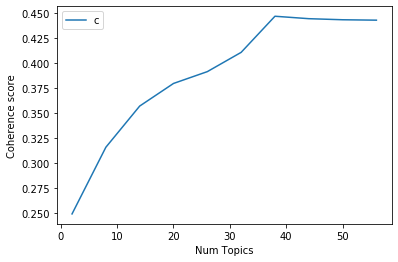

In [ ]:
#(optional) to identify optimum number of topic
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=60, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
#plt.show()